In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import skdim
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

In [2]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/FCLp-SGSM_left/10-57-28_18"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"

In [3]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-23.007214,1.339242,77.771520,28.649020,-8.606827,-19.310991,-15.533434,19.145382,-36.007040,-52.828697,...,-12.626472,-47.808180,-32.542034,-17.132025,-56.126940,0.205345,4.695686,16.708454,15.847790,-35.819020
sub-1000458,51.441730,-1.688473,28.853212,0.748013,-61.335686,-0.774141,-8.083467,8.676333,-43.966730,-8.397926,...,44.017612,-14.258607,9.433247,15.169565,-66.900310,16.951403,1.938268,-8.067241,13.267559,5.258145
sub-1000575,13.593754,1.209562,75.539340,7.054111,-17.813526,-2.071952,-27.877878,-32.768494,-22.641330,14.253552,...,6.106257,-13.816744,-42.761860,4.317874,-72.739150,13.247750,78.895110,7.587140,18.817217,-33.071327
sub-1000606,-13.374477,-13.562806,42.429737,22.272593,-28.266972,-20.032284,-12.285065,0.645646,-47.976692,-9.064986,...,7.433171,-52.683660,-51.250965,-42.361683,-78.149390,30.735455,-1.125652,15.758553,-9.711869,1.843732
sub-1000963,6.611379,-40.345010,67.729520,60.878735,3.174891,-3.662391,-6.514160,9.908224,-48.401090,-38.055824,...,-34.023056,4.217293,-12.724528,-45.617820,-68.574554,-25.117086,0.190796,-26.676567,-12.110066,-22.405912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-21.777775,6.882320,9.960737,33.844670,-51.656550,-4.292736,2.323873,-0.184421,-34.933700,-44.682453,...,-10.338558,27.917320,51.564080,-1.784828,-60.920070,-21.301468,-10.609091,4.086034,-14.602349,0.434619
sub-6023808,-65.586740,-0.504928,1.139466,36.936210,6.405604,-13.703249,-6.701279,31.440828,-62.905796,16.430487,...,17.908348,-0.637116,-33.963528,-38.416542,-7.601238,-7.280966,8.368915,56.835114,-17.816936,-49.713436
sub-6023847,-45.835280,10.310821,53.285680,13.703062,-0.482723,-52.789740,-41.289177,11.865098,-11.690469,-10.831749,...,-29.169388,-34.803158,-42.124245,1.386631,-45.567630,-30.579456,20.946627,70.895546,28.972158,-34.293380


# UKBioBank

In [4]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [5]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-23.007214,1.339242,77.771520,28.649020,-8.606827,-19.310991,-15.533434,19.145382,-36.007040,-52.828697,...,-12.626472,-47.808180,-32.542034,-17.132025,-56.126940,0.205345,4.695686,16.708454,15.847790,-35.819020
sub-1000458,51.441730,-1.688473,28.853212,0.748013,-61.335686,-0.774141,-8.083467,8.676333,-43.966730,-8.397926,...,44.017612,-14.258607,9.433247,15.169565,-66.900310,16.951403,1.938268,-8.067241,13.267559,5.258145
sub-1000575,13.593754,1.209562,75.539340,7.054111,-17.813526,-2.071952,-27.877878,-32.768494,-22.641330,14.253552,...,6.106257,-13.816744,-42.761860,4.317874,-72.739150,13.247750,78.895110,7.587140,18.817217,-33.071327
sub-1000606,-13.374477,-13.562806,42.429737,22.272593,-28.266972,-20.032284,-12.285065,0.645646,-47.976692,-9.064986,...,7.433171,-52.683660,-51.250965,-42.361683,-78.149390,30.735455,-1.125652,15.758553,-9.711869,1.843732
sub-1000963,6.611379,-40.345010,67.729520,60.878735,3.174891,-3.662391,-6.514160,9.908224,-48.401090,-38.055824,...,-34.023056,4.217293,-12.724528,-45.617820,-68.574554,-25.117086,0.190796,-26.676567,-12.110066,-22.405912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-21.777775,6.882320,9.960737,33.844670,-51.656550,-4.292736,2.323873,-0.184421,-34.933700,-44.682453,...,-10.338558,27.917320,51.564080,-1.784828,-60.920070,-21.301468,-10.609091,4.086034,-14.602349,0.434619
sub-6023808,-65.586740,-0.504928,1.139466,36.936210,6.405604,-13.703249,-6.701279,31.440828,-62.905796,16.430487,...,17.908348,-0.637116,-33.963528,-38.416542,-7.601238,-7.280966,8.368915,56.835114,-17.816936,-49.713436
sub-6023847,-45.835280,10.310821,53.285680,13.703062,-0.482723,-52.789740,-41.289177,11.865098,-11.690469,-10.831749,...,-29.169388,-34.803158,-42.124245,1.386631,-45.567630,-30.579456,20.946627,70.895546,28.972158,-34.293380


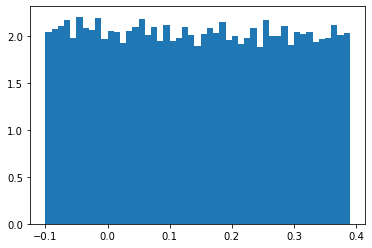

In [6]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

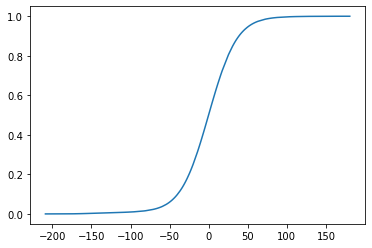

In [7]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [8]:
X2[int(N*0.59)]

6.3696647

In [9]:
len(ukb_emb)

21051

In [10]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [11]:
ukb_positive

dim227    1.000000
dim113    1.000000
dim64     0.997957
dim115    0.991592
dim3      0.959954
            ...   
dim251    0.020094
dim58     0.018574
dim84     0.000238
dim56     0.000000
dim90     0.000000
Length: 256, dtype: float64

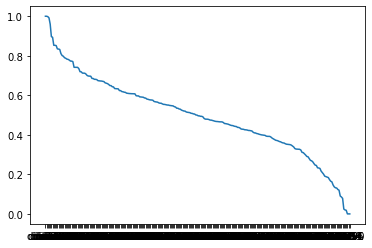

In [12]:
plt.plot(ukb_positive)

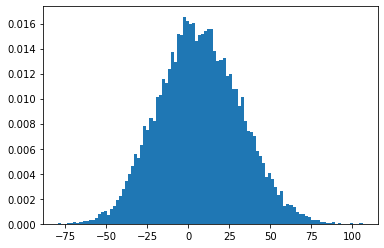

In [13]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

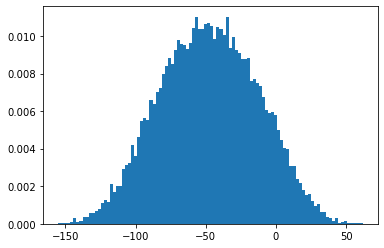

In [14]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

# UMAP

In [15]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [16]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

In [17]:
umap_ukb = visual_ukb_emb

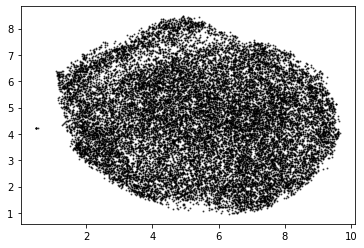

In [18]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

# UKB latent space analysis

In [19]:
global_id = skdim.id.MOM().fit(ukb_emb, n_neighbors=1000)

In [20]:
global_id.dimension_

10.686638054742193

In [21]:
# lid_mom = skdim.id.lPCA().fit_pw(ukb_emb, n_neighbors=50, n_jobs=1)

In [22]:
# lid_mom.dimension_

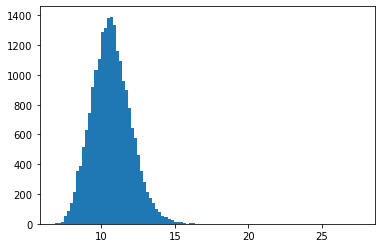

In [23]:

h = plt.hist(global_id.dimension_pw_, bins=100)

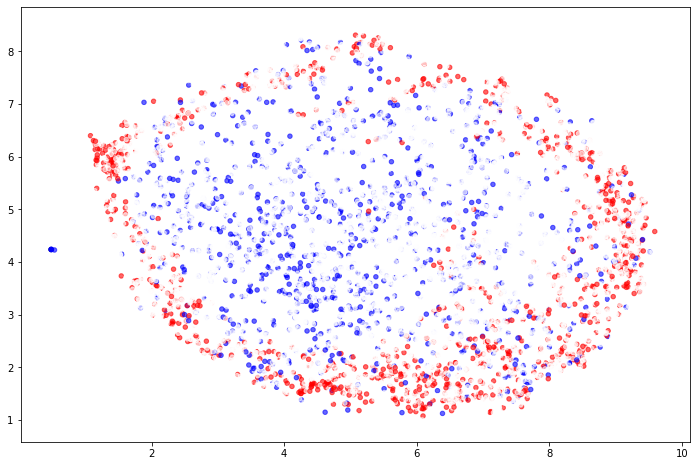

In [24]:
plt.figure(figsize=(12,8))
q_min = np.min(global_id.dimension_pw_)
q_05 = np.quantile(global_id.dimension_pw_, 0.05) 
q_95 = np.quantile(global_id.dimension_pw_, 0.95)
q_max = np.max(global_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=global_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

In [25]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(ukb_emb)

In [26]:
distances, indices = nbrs.kneighbors(ukb_emb)

In [27]:
distances.shape

(21051, 2)

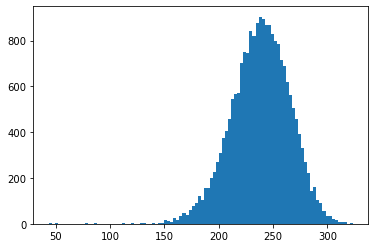

In [28]:
h = plt.hist(distances[:,1], bins=100)

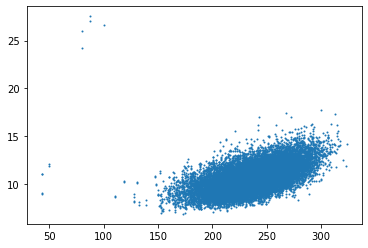

In [29]:
plt.scatter(distances[:,1], global_id.dimension_pw_, s=1)

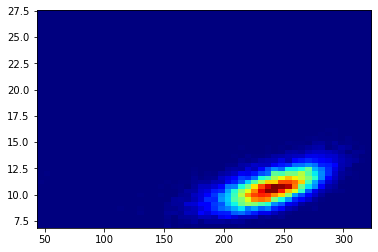

In [31]:
heatmap, xedges, yedges = np.histogram2d(distances[:,1], global_id.dimension_pw_, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()